## get data

In [1]:
def get_ytw():
    import nb_credit_spread as cslibrary

    cslib = cslibrary.creditspread()
    start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'

    ytw = cslib.get_ytw_from_date_delta(start=start_date)
    return ytw

## plot ACF and PACF

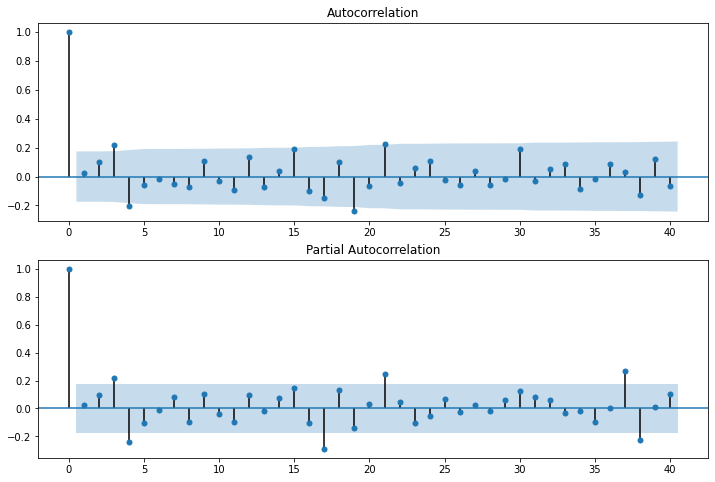

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
'''
df = get_ytw()
df = df['CS-Aaa-3MO']
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)# , lags=40
'''
df = get_ytw()
# Market-RMRF
# 'Econ-UNRATE-diff', 'Econ-DSPIC96-diff', 'Econ-CPIAUCSL-diff', 'Econ-CPILFESL-diff', 'Econ-INDPRO-diff', 'Econ-PCE-diff'
df = df['CS-Aaa-3MO-diff']
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)# , lags=40

## basic ARIMA

---------- ARIMA order: (2, 1, 0) ----------
                               SARIMAX Results                                
Dep. Variable:             CS-Aaa-3MO   No. Observations:                  127
Model:                 ARIMA(2, 1, 0)   Log Likelihood                   4.964
Date:                Mon, 05 Oct 2020   AIC                             -3.927
Time:                        16:33:02   BIC                              4.582
Sample:                    01-31-2009   HQIC                            -0.470
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P&gt;|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2439      0.058     -4.202      0.000      -0.358      -0.130
ar.L2          0.3571      0.054      6.665      0.000       0.252       0.462
sigm

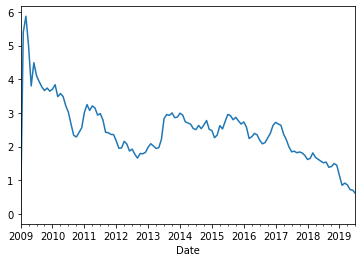

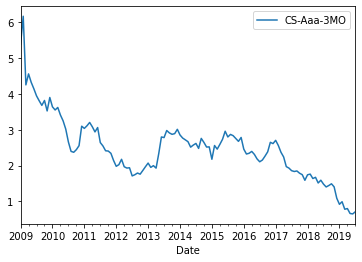

In [41]:
import nb_credit_spread as cslibrary
from statsmodels.tsa.arima.model import ARIMA

cslib = cslibrary.creditspread()
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'

ytw = cslib.get_ytw_from_date_delta(start=start_date)
# 'Econ-UNRATE-diff', 'Econ-DSPIC96-diff', 'Econ-CPIAUCSL-diff', 'Econ-CPILFESL-diff', 'Econ-INDPRO-diff', 'Econ-PCE-diff'
# t = t.append(run_model(df, column='CS-Aaa-3MO', order=(3, 1, 3), exog=exog, trend=trend), ignore_index=True)
# t = t.append(run_model(df, column='CS-Aa-3MO', order=(1, 1, 3), exog=exog, trend=trend), ignore_index=True)
# t = t.append(run_model(df, column='CS-A-3MO', order=(2, 1, 2), exog=exog, trend=trend), ignore_index=True)
# t = t.append(run_model(df, column='CS-Baa-3MO', order=(3, 1, 4), exog=exog, trend=trend), ignore_index=True)

endog = ytw[ ['CS-Aaa-3MO'] ] 
# exog = ytw[ ['Econ-UNRATE-diff', 'Econ-DSPIC96-diff', 'Econ-CPIAUCSL-diff', 'Econ-CPILFESL-diff', 'Econ-INDPRO-diff', 'Econ-PCE-diff'] ]

o = (2, 1, 0)
print(f"{'-'*10} ARIMA order: {o} {'-'*10}")
model = ARIMA(endog=endog, exog=exog, order=o) #, trend='c')
# model = ARIMA(endog=endog, exog=None, order=o, trend=None)
model_fit = model.fit()
print(model_fit.summary())
print(f"model fit bic: {model_fit.bic}")
model_fit.predict().plot()
endog.plot()
print(model_fit.resid)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x12705e3a0&gt;

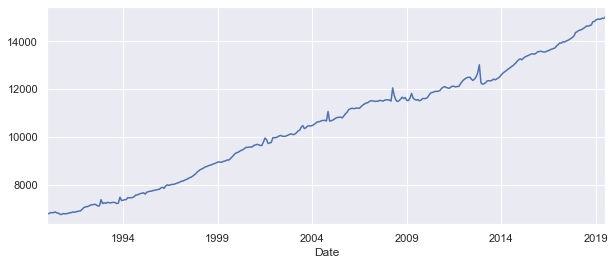

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import nb_credit_spread as cslibrary

cslib = cslibrary.creditspread()
start_date = '1990-01-31' # '2009-01-31' #'1990-01-31' # '2009-01-31'
ytw = cslib.get_ytw_from_date_delta(start=start_date)

sns.set()
fig = plt.figure(figsize=(10,4))


import numpy as np

df = ytw
pce, pce_log  = df['Econ-PCE'], np.log(df['Econ-PCE'])
unrate, unrate_log = df['Econ-UNRATE'], np.log(df['Econ-UNRATE'])
dspic96, dspic96_log = df['Econ-DSPIC96'], np.log(df['Econ-DSPIC96'])
plt.clf()
dspic96.plot()
# pce_log.plot()
# unrate_log.plot()
# plt.plot(pce)


In [62]:
from statsmodels.tsa.stattools import grangercausalitytests
df = get_ytw()
print(df.index)

grangercausalitytests(df[ ['CS-Aaa-3MO', 'Econ-PCE'] ], maxlag=1)


DatetimeIndex([&#39;2009-01-31&#39;, &#39;2009-02-28&#39;, &#39;2009-03-31&#39;, &#39;2009-04-30&#39;,
               &#39;2009-05-31&#39;, &#39;2009-06-30&#39;, &#39;2009-07-31&#39;, &#39;2009-08-31&#39;,
               &#39;2009-09-30&#39;, &#39;2009-10-31&#39;,
               ...
               &#39;2018-10-31&#39;, &#39;2018-11-30&#39;, &#39;2018-12-31&#39;, &#39;2019-01-31&#39;,
               &#39;2019-02-28&#39;, &#39;2019-03-31&#39;, &#39;2019-04-30&#39;, &#39;2019-05-31&#39;,
               &#39;2019-06-30&#39;, &#39;2019-07-31&#39;],
              dtype=&#39;datetime64[ns]&#39;, name=&#39;Date&#39;, length=127, freq=&#39;M&#39;)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0840  , p=0.0259  , df_denom=123, df_num=1
ssr based chi2 test:   chi2=5.2080  , p=0.0225  , df=1
likelihood ratio test: chi2=5.1033  , p=0.0239  , df=1
parameter F test:         F=5.0840  , p=0.0259  , df_denom=123, df_num=1


{1: ({&#39;ssr_ftest&#39;: (5.084044209274282, 0.02591561771335879, 123.0, 1),
   &#39;ssr_chi2test&#39;: (5.208045287549265, 0.022482598005837982, 1),
   &#39;lrtest&#39;: (5.103288346932118, 0.02388053028076488, 1),
   &#39;params_ftest&#39;: (5.084044209274307, 0.02591561771335873, 123.0, 1.0)},
  [&lt;statsmodels.regression.linear_model.RegressionResultsWrapper at 0x12a43f9a0&gt;,
   &lt;statsmodels.regression.linear_model.RegressionResultsWrapper at 0x12a43f7f0&gt;,
   array([[0., 1., 0.]])])}

In [54]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

df = get_ytw()
cs = 'CS-Aaa-3MO'
data = df[ [cs] ]
out = coint_johansen(endog=data, det_order=-1, k_ar_diff=5)

d = {'0.90':0, '0.95':1, '0.99':2}
alpha = 0.05
traces = out.lr1 # trace statistic
cvts = out.cvt[:, d[str(1-alpha)]]  # critical values

def adjust(val, length= 10): return str(val).ljust(length)

for col, trace, cvt in zip(cs, traces, cvts):
    # log.info(adjust(col))
    summary = f"{adjust(col)}::{adjust(round(trace,2), 9)} > {adjust(cvt, 8)} => {trace > cvt}"
    print(summary)


C         ::4.01      &gt; 4.1296   =&gt; False
